In [ ]:
!git clone https://github.com/jalpv1//wiki-art-selected-resized-downsampled
!rm -rf .//wiki-art-selected-resized-downsampled/.git
model_name ="transformer_903"
cv = 5

Cloning into 'wiki-art-selected-resized-downsampled'...
remote: Enumerating objects: 18446, done.
remote: Total 18446 (delta 0), reused 0 (delta 0), pack-reused 18446 (from 1)
Receiving objects: 100% (18446/18446), 843.56 MiB | 44.78 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (18505/18505), done.


In [1]:
!pip install torchsampler
!pip install xgboost
!pip install torchmetrics
!pip install pytorch_lightning
!pip install optuna
!pip install memory_profiler
!pip install scikit-learn
!pip install matplotlib
! pip install imageio
! pip install cv2
! pip install scikit-image
!pip install opencv-python-headless
!pip install scikit-image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 16.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 120.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 22.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 39.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from torch.utils.data import WeightedRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imageio as io
from PIL import Image
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import torchmetrics
import pytorch_lightning as pl

import data_loader as dl
import experiments as e


!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter
class_names = ['Abstract_Expressionism','Baroque','Cubism', 'Fauvism', 'Impressionism','Minimalism','Naive_Art_Primitivism','Pointillism','Rococo','Ukiyo_e']
device = 'cuda'

num_classes = 10


Python 3.11.6
/usr/bin/sh: line 1: nvcc: command not found
Source files will be saved in "/tmp/tmp1zuq9dmc".


In [3]:
class ArtStyleDataset(Dataset):
  def __init__(self, root_dir, transform = None, transform_tensor = None):
     self.imgs = ImageFolder(root_dir)
     self.root_dir = root_dir
     self.transform = transform
     self.transform_tensor = transform_tensor


  def __len__(self):
        return len(self.imgs)

  def __getitem__(self, idx):
        sample, label = self.imgs[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, label
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
data = ArtStyleDataset('wiki-art-selected-resized-downsampled', transform)


In [4]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 53.6 MB/s eta 0:00:00


In [5]:
import torch
import torch.nn as nn
import timm

class ViTFeatureExtractor(nn.Module):
    def __init__(self, model_name: str = "vit_base_patch16_224", layer_name: str = "blocks.6", extract_cls: bool = True):
        """
        Extract features from a specified layer of a Vision Transformer (ViT).

        :param model_name: The name of the ViT model from `timm`
        :param layer_name: The layer from which to extract features (e.g., "blocks.6")
        :param extract_cls: If True, return only the CLS token feature
        """
        super(ViTFeatureExtractor, self).__init__()

        # Load pretrained ViT model from timm
        self.model = timm.create_model(model_name, pretrained=True)
        self.layer_name = layer_name
        self.extract_cls = extract_cls  # Flag for CLS token extraction
        self.activations = dict()

        # Define hook function
        def hook(module, input, output):
            self.activations[layer_name] = output  # Store output of the hooked layer

        # Register hook on the specified layer
        layer = dict(self.model.named_modules())[layer_name]
        layer.register_forward_hook(hook)

    def forward(self, x):
        """
        Forward pass through the ViT model, capturing activations from the specified layer.

        :param x: Input image tensor of shape (batch_size, 3, 224, 224)
        :return: Extracted features from the specified layer (CLS token if extract_cls=True)
        """
        _ = self.model(x)  # Run forward pass
        features = self.activations[self.layer_name]  # Extracted features

        if self.extract_cls:
            return features[:, 0]  # Extract only CLS token (first token)
        return features  # Return full features

device = 'cpu'

model = ViTFeatureExtractor().to(device)

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import cv2
from skimage import feature

def rgb_to_cielab(image):
    #print(np.shape(image))
    if image.shape[0] == 3:
        image = image.transpose(1, 2, 0)
    return cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

def rgb_to_cieluv(image):
    if image.shape[0] == 3:
        image = image.transpose(1, 2, 0)
    return cv2.cvtColor(image, cv2.COLOR_RGB2LUV)

def rgb_to_hsv(image):
    if image.shape[0] == 3:
        image = image.transpose(1, 2, 0)
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
def rgb_to_cieYCrCb(image):
    if image.shape[0] == 3:
        image = image.transpose(1, 2, 0)
    return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

def extract_color_features(image):
    features = []
    for color_space_func in [rgb_to_cielab, rgb_to_cieYCrCb, rgb_to_hsv]:
        transformed_image = color_space_func(image)
        mean = np.mean(transformed_image, axis=(0, 1))
        std = np.std(transformed_image, axis=(0, 1))
        features.extend(mean)
        features.extend(std)
    return features

def extract_lbp(image):
   image = np.transpose(image, (1, 2, 0))
   image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   sample_detailed = feature.local_binary_pattern(image, P=8, R=1, method='uniform')
   sample_broad = feature.local_binary_pattern(image, P=24, R=3, method='uniform')
   hist_detailed = np.histogram(sample_detailed, bins=10)[0]
   hist_broad = np.histogram(sample_broad, bins=26)[0]
   return  np.concatenate([hist_detailed, hist_broad])

def extract_color_palette(image, num_colors=5):
    if len(image.shape) == 3 and image.shape[2] == 3:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image_rgb = image
    pixels = image_rgb.reshape((-1, 3))
    pixels = np.float32(pixels)
    _, labels, centers = cv2.kmeans(pixels, num_colors, None,
                                    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
                                    attempts=10,
                                    flags=cv2.KMEANS_RANDOM_CENTERS)
   # print(centers)
    centroids = centers.flatten().tolist()

    return  centroids

def extract_features(model, train_loader):
  features = []
  labels_ = []
  map_img_feature = {}
  for inputs, labels in train_loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      feature = model(inputs)
      #print(feature)

      #feature = feature.mean((2,3)).squeeze()
      transformer_feature = feature.squeeze(0).detach().cpu().numpy()

      print(f"transformer_feature - {np.shape(transformer_feature)}")
      color_feature = extract_color_features(inputs.squeeze().detach().cpu().numpy())
      color_palette = extract_color_palette(inputs.squeeze().detach().cpu().numpy(), num_colors=15)
      lbp_features = extract_lbp(inputs.squeeze().detach().cpu().numpy())
      concatenated_vector = np.concatenate((transformer_feature, color_feature, color_palette, lbp_features))
      print(f"concated vector  - {np.shape(concatenated_vector)}")
      features.append(concatenated_vector)
      # no clustering
      # concatenated_vector = np.concatenate((cnn_feature, color_feature))
      # features.append(concatenated_vector)
      labels_.append(labels.cpu().numpy())
      print("----------------------------------")

  return features, labels_, map_img_feature


In [7]:
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name + " new")



transformer_feature - (768,)
concated vector  - (867,)
----------------------------------


/opt/conda/lib/python3.11/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transformer_feature - (768,)
concated vector  - (867,)
----------------------------------
transforme

NameError: name 'model_name' is not defined

In [10]:
dl.save_pickle(train_data,train_labels, "trans" + " new")


saved


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

#dl.save_pickle(train_data,train_labels, model_name)


X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")


Train: 14804, Test: 3701


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  ConfusionMatrixDisplay
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
)
import xgboost


models = {
    "Random Forest": RandomForestClassifier(n_estimators = 500, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=30, metric='cosine'),
    "MLP": MLPClassifier(
    hidden_layer_sizes=(300, 150, 75),
                    max_iter=500,
                    solver='adam',
                    learning_rate="adaptive",
                    learning_rate_init=0.001,
                    early_stopping=True,
                    random_state=42),
    "XgBoost":  XGBRFClassifier(n_estimators=500, max_depth=20, random_state=42)
}

for name in models.keys():
  print(f"Model: {name}")
  avg = e.kfold_crossvalidation(train_data, train_labels, 5,  models[name], 1)
  print(avg)





Model: Random Forest
       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.900994  0.898676  0.898244  0.898676  189.268474   
1         2   0.896967  0.893002  0.892329  0.893002  190.011585   
2         3   0.883014  0.878411  0.878024  0.878411  190.098437   
3         4   0.891988  0.888679  0.888104  0.888679  190.356179   
4         5   0.893138  0.888949  0.888289  0.888949  189.787908   
5   Average   0.893220  0.889543  0.888998  0.889543  189.904517   
6  1.581139   0.006711  0.007423  0.007388  0.007423    0.409639   

   Prediction time  
0         0.463228  
1         0.486679  
2         0.463378  
3         0.432449  
4         0.501878  
5         0.469522  
6         0.026425  
Model: SVM
       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.903225  0.902999  0.902750  0.902999   27.828753   
1         2   0.901252  0.900838  0.900645  0.900838   30.864154   
2         3   0.895867  0.895163  0.895092  0.89516

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle


with open('X_transnew.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('Y_transnew.pickle', 'rb') as handle:
    train_labels = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 14804, Test: 3701


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from joblib import parallel_backend
import numpy as np
import logging


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1200, step=100),  # More trees for better performance
        "max_depth": trial.suggest_int("max_depth", 3, 50),  # Shallow trees avoid overfitting, deeper trees capture complexity
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),  # Regularization to prevent overfitting
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),  # Smaller leaf size = more flexible tree
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),  # Feature selection
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),  # Whether to use bootstrapping
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),  # Splitting criteria
    }

    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    
    scorer = make_scorer(f1_score, average="weighted")
    scores = cross_val_score(model, train_data_scaled, train_labels, scoring=scorer, cv=skf, n_jobs=5)
    score = np.mean(scores)
    logging.info(f"Trial {trial.number} finished with value: {score:.5f} and parameters: {trial.params}")

    return score


study1 = optuna.create_study( study_name= "rf_tr",storage="sqlite:///rf_tr.db",direction="maximize", pruner=optuna.pruners.MedianPruner())
study1.optimize(objective, n_trials=50,n_jobs=5)

df = study1.trials_dataframe()
df.to_csv("rf_tr.csv", index=False)
logging.info("Optuna study completed. Results saved to optuna_results.csv.")

best_params = study1.best_params
logging.info(f"Best parameters: {best_params}")
print("Best parameters for classifier:", study1.best_params)
print("Best F1-score for classifier:", study1.best_value)

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_optimization_history(study1)
plt.title("Optuna Optimization History")
plt.savefig("op_rf_tr.png")
plt.show()

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_param_importances(study1)
#plt.title("Hyperparameter Importance")
plt.savefig("pi_rf_tr.png")
plt.show()

logging.info("Plots saved: optimization_history.png and param_importance.png")


[I 2025-03-29 16:54:51,163] A new study created in RDB with name: rf_tr
[I 2025-03-29 17:36:43,248] Trial 2 finished with value: 0.851924309445986 and parameters: {'n_estimators': 1200, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 2 with value: 0.851924309445986.
[I 2025-03-29 17:37:58,951] Trial 3 finished with value: 0.8701544195602577 and parameters: {'n_estimators': 700, 'max_depth': 47, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 3 with value: 0.8701544195602577.
[I 2025-03-29 17:39:03,747] Trial 1 finished with value: 0.8760912665205227 and parameters: {'n_estimators': 400, 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 1 with value: 0.8760912665205227.
[I 2025-03-29 17:41:10,835] Trial 4 finished 

[I 2025-03-29 22:34:42,495] Trial 46 finished with value: 0.8949437556921375 and parameters: {'n_estimators': 1000, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 46 with value: 0.8949437556921375.
[I 2025-03-29 22:37:09,746] Trial 44 finished with value: 0.895482553218218 and parameters: {'n_estimators': 700, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 44 with value: 0.895482553218218.
/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[I 2025-03-29 22:40:40,032] Trial 47 finished with value: 0.8949437556921375 and parameters: {'n_estimators': 1000, 'max_depth': 27, 'min_samples_split': 3, 'm

Best parameters for classifier: {'n_estimators': 700, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}
Best F1-score for classifier: 0.895482553218218


<Figure size 800x600 with 0 Axes>

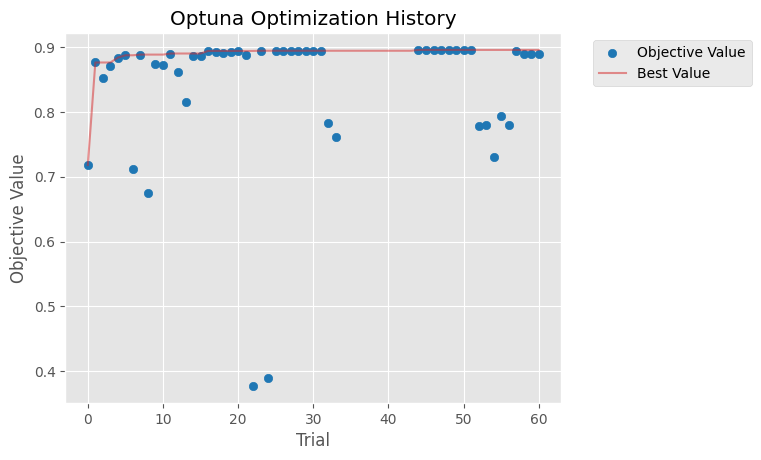

/tmp/ipykernel_13947/644835680.py:52: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study1)


<Figure size 800x600 with 0 Axes>

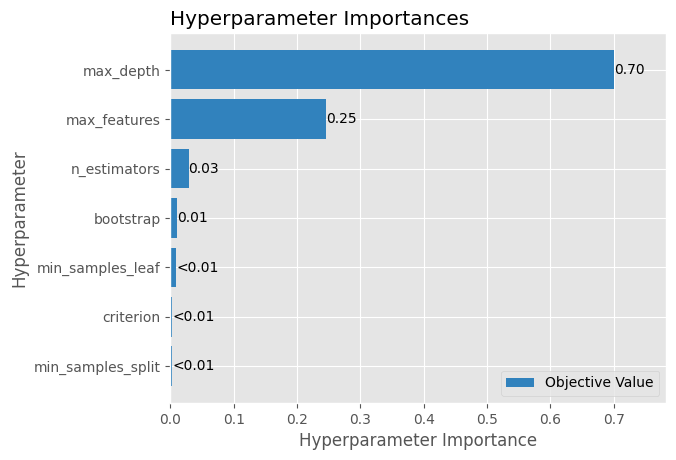

In [4]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from joblib import parallel_backend
import numpy as np
import logging


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1200, step=100),  # More trees for better performance
        "max_depth": trial.suggest_int("max_depth", 3, 50),  # Shallow trees avoid overfitting, deeper trees capture complexity
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),  # Regularization to prevent overfitting
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),  # Smaller leaf size = more flexible tree
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),  # Feature selection
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),  # Whether to use bootstrapping
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),  # Splitting criteria
    }

    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    
    scorer = make_scorer(f1_score, average="weighted")
    scores = cross_val_score(model, train_data_scaled, train_labels, scoring=scorer, cv=skf, n_jobs=5)
    score = np.mean(scores)
    logging.info(f"Trial {trial.number} finished with value: {score:.5f} and parameters: {trial.params}")

    return score


study1 = optuna.load_study( study_name= "rf_tr",storage="sqlite:///rf_tr.db")
study1.optimize(objective, n_trials=17,n_jobs=5)

df = study1.trials_dataframe()
df.to_csv("rf_tr.csv", index=False)
logging.info("Optuna study completed. Results saved to optuna_results.csv.")

best_params = study1.best_params
logging.info(f"Best parameters: {best_params}")
print("Best parameters for classifier:", study1.best_params)
print("Best F1-score for classifier:", study1.best_value)

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_optimization_history(study1)
plt.title("Optuna Optimization History")
plt.savefig("op_rf_tr.png")
plt.show()

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_param_importances(study1)
#plt.title("Hyperparameter Importance")
plt.savefig("pi_rf_tr.png")
plt.show()

logging.info("Plots saved: optimization_history.png and param_importance.png")


In [ ]:
32 here

In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from joblib import parallel_backend
import numpy as np
import logging
import xgboost as xgb


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1200, step=100),  
        "max_depth": trial.suggest_int("max_depth", 3, 50),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-2, 10, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-2, 10, log=True),
        "objective": "multi:softmax",  
        "eval_metric": "mlogloss",
        "tree_method": "hist",  
    }

    model = xgb.XGBClassifier(**params, random_state=42, n_jobs=-1)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    
    scorer = make_scorer(f1_score, average="weighted")
    scores = cross_val_score(model, train_data_scaled, train_labels, scoring=scorer, cv=skf, n_jobs=4)
    score = np.mean(scores)
    logging.info(f"Trial {trial.number} finished with value: {score:.5f} and parameters: {trial.params}")

    return score


study = optuna.load_study( study_name= "xg_tr",storage="sqlite:///xg_tr.db")
study.optimize(objective, n_trials=50, n_jobs=16)

df = study.trials_dataframe()
df.to_csv("or_xg_tr.csv", index=False)
logging.info("Optuna study completed. Results saved to optuna_results.csv.")

best_params = study.best_params
logging.info(f"Best parameters: {best_params}")
print("Best parameters for classifier:", study.best_params)
print("Best F1-score for classifier:", study.best_value)

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optuna Optimization History")
plt.savefig("op_xg_tr.png")
plt.show()

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_param_importances(study)
plt.savefig("pi_xg_tr.png")
plt.show()

logging.info("Plots saved: optimization_history.png and param_importance.png")


[I 2025-03-30 07:17:05,148] Trial 21 finished with value: 0.8842454429835639 and parameters: {'n_estimators': 700, 'max_depth': 10, 'learning_rate': 0.06512501581324927, 'subsample': 0.861064991051868, 'colsample_bytree': 0.6804458056837308, 'gamma': 4.36959068424493, 'reg_lambda': 0.6460654775187878, 'reg_alpha': 0.02035870894848173}. Best is trial 21 with value: 0.8842454429835639.
[I 2025-03-30 08:46:40,861] Trial 26 finished with value: 0.8887390611214461 and parameters: {'n_estimators': 1100, 'max_depth': 23, 'learning_rate': 0.040335844272888007, 'subsample': 0.9994628647029884, 'colsample_bytree': 0.680193670584692, 'gamma': 3.3086247162131395, 'reg_lambda': 4.198058943859673, 'reg_alpha': 0.4774667659548787}. Best is trial 26 with value: 0.8887390611214461.
[I 2025-03-30 08:59:57,455] Trial 27 finished with value: 0.9052791288355111 and parameters: {'n_estimators': 300, 'max_depth': 48, 'learning_rate': 0.20544983589489316, 'subsample': 0.7981132755226068, 'colsample_bytree': 0